# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 24

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 3

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
156,Butland,Crystal Palace,44,3.0,14,17.598650,4.7,5.866217,11.489826,43.833241,2.796609
129,Arrizabalaga,Chelsea,47,4.0,19,17.370993,4.8,4.342748,6.333834,32.692481,2.003160
475,Sá,Wolves,52,22.0,98,90.428979,4.5,4.110408,4.080039,41.521555,1.802533
559,Ramsdale,Arsenal,51,19.0,101,76.702260,5.3,4.036961,4.927712,35.475099,1.787596
376,Foster,Watford,41,11.0,38,39.344151,3.5,3.576741,3.288417,38.759549,1.766426
270,de Gea,Manchester Utd,53,23.0,92,93.440182,4.0,4.062617,5.247672,43.200371,1.764688
448,Gunn,Norwich City,40,4.0,15,13.974215,3.8,3.493554,4.692534,36.317157,1.746777
333,Forster,Southampton,44,6.0,16,21.691213,2.7,3.615202,3.888797,38.711989,1.723480
353,Lloris,Tottenham,54,21.0,87,83.416018,4.1,3.972191,4.129716,47.799757,1.709359


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,56,6.0,54,37.227490,9.0,6.204582,NaN,40.529597,2.621914
237,Alexander-Arnold,Liverpool,85,21.0,150,137.911422,7.1,6.567211,5.031996,50.374273,2.252535
256,Cancelo,Manchester City,72,23.0,141,135.944603,6.1,5.910635,5.660900,45.193699,2.202764
142,James,Chelsea,62,16.0,91,81.738973,5.7,5.108686,1.300000,32.046025,2.051698
122,Alonso,Chelsea,56,18.0,74,85.182470,4.1,4.732359,4.018448,36.410776,1.999787
259,Laporte,Manchester City,58,20.0,107,95.034698,5.3,4.751735,5.500900,34.155793,1.973051
252,Stones,Manchester City,52,8.0,45,35.757079,5.6,4.469635,4.706232,30.723211,1.960065
245,Tsimikas,Liverpool,37,9.0,33,33.543038,3.7,3.727004,3.892687,31.936805,1.937577
501,Sarr,Chelsea,49,3.0,16,12.778245,5.3,4.259415,3.833834,37.607810,1.924208


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,67,4.0,26,25.265635,6.5,6.316409,NaN,33.755008,2.440242
681,Coutinho,Aston Villa,72,3.0,25,18.178436,8.3,6.059479,5.964254,48.281049,2.258234
233,Salah,Liverpool,128,21.0,178,158.895356,8.5,7.566446,5.607114,55.699480,2.114886
240,Jota,Liverpool,85,22.0,125,130.801468,5.7,5.945521,6.344299,51.895791,2.039297
420,Bowen,West Ham,69,24.0,135,128.485656,5.6,5.353569,9.156458,36.789822,2.038069
265,Foden,Manchester City,80,16.0,81,87.962540,5.1,5.497659,4.894201,42.167705,1.943716
196,Raphinha,Leeds United,65,20.0,94,95.183974,4.7,4.759199,4.950874,44.165246,1.866711
144,Gallagher,Crystal Palace,62,20.0,102,89.152750,5.1,4.457638,3.631429,44.062775,1.790230
250,Gündogan,Manchester City,72,16.0,72,76.262540,4.5,4.766409,1.000000,29.451449,1.776336


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,79,6.0,26,34.660,4.3,5.776667,3.200000,38.397595,2.055246
189,Bamford,Leeds United,77,6.0,25,27.142,4.2,4.523667,NaN,38.523399,1.630216
468,King,Watford,59,20.0,70,77.104,3.5,3.855200,3.814200,40.258462,1.587161
413,Antonio,West Ham,78,23.0,102,100.117,4.4,4.352913,4.648400,41.779338,1.558593
78,Toney,Brentford,66,21.0,77,82.782,3.7,3.942000,5.500000,40.251475,1.534421
518,Broja,Southampton,52,19.0,70,64.642,3.7,3.402211,4.120000,37.123744,1.491968
307,Saint-Maximin,Newcastle Utd,69,22.0,89,85.755,4.0,3.897955,4.523667,36.003012,1.483926
450,Dennis,Watford,62,20.0,95,73.826,4.8,3.691300,2.100000,37.826451,1.482462
315,Pukki,Norwich City,58,22.0,79,76.311,3.6,3.468682,3.392750,32.436711,1.440292


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
233,Salah,Liverpool,128,21.0,178,158.895356,8.5,7.566446,55.699480,2.114886
237,Alexander-Arnold,Liverpool,85,21.0,150,137.911422,7.1,6.567211,50.374273,2.252535
268,Torres,Manchester City,67,4.0,26,25.265635,6.5,6.316409,33.755008,2.440242
135,Chilwell,Chelsea,56,6.0,54,37.227490,9.0,6.204582,40.529597,2.621914
681,Coutinho,Aston Villa,72,3.0,25,18.178436,8.3,6.059479,48.281049,2.258234
240,Jota,Liverpool,85,22.0,125,130.801468,5.7,5.945521,51.895791,2.039297
256,Cancelo,Manchester City,72,23.0,141,135.944603,6.1,5.910635,45.193699,2.202764
253,Mendy,Manchester City,52,1.0,3,5.894635,3.0,5.894635,33.119386,2.584968
156,Butland,Crystal Palace,44,3.0,14,17.598650,4.7,5.866217,43.833241,2.796609


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
156,Butland,Crystal Palace,44,3.0,4.7,5.866217,11.489826,43.833241,2.796609
135,Chilwell,Chelsea,56,6.0,9.0,6.204582,NaN,40.529597,2.621914
268,Torres,Manchester City,67,4.0,6.5,6.316409,NaN,33.755008,2.440242
681,Coutinho,Aston Villa,72,3.0,8.3,6.059479,5.964254,48.281049,2.258234
237,Alexander-Arnold,Liverpool,85,21.0,7.1,6.567211,5.031996,50.374273,2.252535
256,Cancelo,Manchester City,72,23.0,6.1,5.910635,5.660900,45.193699,2.202764
233,Salah,Liverpool,128,21.0,8.5,7.566446,5.607114,55.699480,2.114886
177,Calvert-Lewin,Everton,79,6.0,4.3,5.776667,3.200000,38.397595,2.055246
142,James,Chelsea,62,16.0,5.7,5.108686,1.300000,32.046025,2.051698


In [11]:
metric = 'adjusted points per game'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
233,Salah,Liverpool,128,21.0,178,158.895356,8.5,7.566446,6.065585,55.699480,2.114886
237,Alexander-Arnold,Liverpool,85,21.0,150,137.911422,7.1,6.567211,6.833110,50.374273,2.252535
268,Torres,Manchester City,67,4.0,26,25.265635,6.5,6.316409,NaN,33.755008,2.440242
135,Chilwell,Chelsea,56,6.0,54,37.227490,9.0,6.204582,NaN,40.529597,2.621914
681,Coutinho,Aston Villa,72,3.0,25,18.178436,8.3,6.059479,5.964254,48.281049,2.258234
240,Jota,Liverpool,85,22.0,125,130.801468,5.7,5.945521,5.949714,51.895791,2.039297
256,Cancelo,Manchester City,72,23.0,141,135.944603,6.1,5.910635,5.961324,45.193699,2.202764
156,Butland,Crystal Palace,44,3.0,14,17.598650,4.7,5.866217,5.695369,43.833241,2.796609
359,Son,Tottenham,107,18.0,115,104.122718,6.4,5.784595,7.337982,59.665167,1.768402


In [24]:
metric = f'gameweek {gameweek+1} prediction'
#metric = f'xPoints_next10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 25 prediction,valuePoints metric
id,,,,,,,,,,
579,Ronaldo,Manchester Utd,125,19.0,87,90.453000,4.6,4.760684,8.805513,1.346525
277,Fernandes,Manchester Utd,117,22.0,100,97.002000,4.5,4.409182,8.666712,1.289036
270,de Gea,Manchester Utd,53,23.0,92,93.440182,4.0,4.062617,8.109683,1.764688
64,Trossard,Brighton,60,21.0,75,80.673948,3.6,3.841617,7.923542,1.568333
289,Greenwood,Manchester Utd,71,18.0,71,70.536818,3.9,3.918712,7.904908,1.470666
69,Sánchez,Brighton,46,21.0,75,76.931792,3.6,3.663419,7.885073,1.708078
63,Maupay,Brighton,65,20.0,79,71.033000,4.0,3.551650,7.820870,1.393072
584,Cucurella,Brighton,51,19.0,72,75.647383,3.8,3.981441,7.545849,1.763012
555,Varane,Manchester Utd,55,13.0,46,48.389364,3.5,3.722259,7.296290,1.587176


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
233,Salah,Liverpool,128,21.0,8.5,7.566446,2.114886,13.2,7.0,20.2,0.961905
240,Jota,Liverpool,85,22.0,5.7,5.945521,2.039297,12.7,4.0,16.7,0.759091
230,Mané,Liverpool,117,20.0,4.8,5.438762,1.590037,10.3,2.9,13.2,0.660000
579,Ronaldo,Manchester Utd,125,19.0,4.6,4.760684,1.346525,9.5,1.7,11.2,0.589474
357,Kane,Tottenham,123,20.0,3.4,4.558100,1.299665,9.1,3.9,13.0,0.650000
420,Bowen,West Ham,69,24.0,5.6,5.353569,2.038069,8.1,4.6,12.7,0.529167
255,Sterling,Manchester City,108,20.0,4.5,4.931309,1.500549,8.0,3.1,11.1,0.555000
413,Antonio,West Ham,78,23.0,4.4,4.352913,1.558593,7.8,5.0,12.8,0.556522
359,Son,Tottenham,107,18.0,6.4,5.784595,1.768402,7.4,3.5,10.9,0.605556


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 25 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
681,Coutinho,Aston Villa,72,3.0,25,18.178436,8.3,6.059479,5.381653,48.281049,2.258234


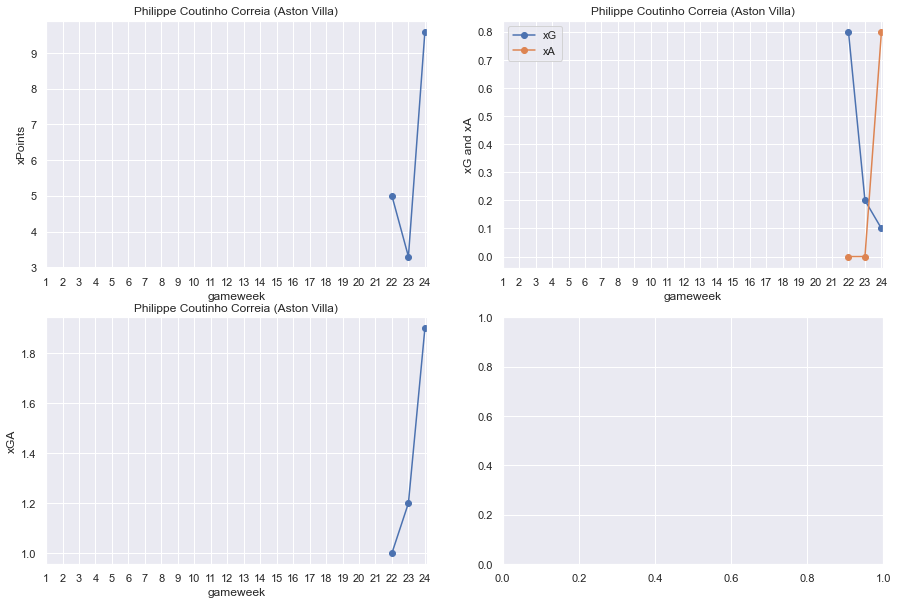

In [25]:
# find player index
name_string = 'Coutinho'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound[['web_name','team_name','now_cost','games played','total_points','adjusted points',\
                      'points_per_game','adjusted points per game',f'gameweek {gameweek+1} prediction',\
                      'xPoints_next10', 'valuePoints metric']])
# plot xPoints over time
ix = playersFound.index[0]
#ix = 266

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [16]:
session = requests.session()

In [17]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [18]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 'app': 'plfpl-web'
}
session.post(url, data=payload)

<Response [200]>

In [19]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [20]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [21]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 66.77850372392848
Predicted points next gameweek: 60.97549390792847


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 25 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,41,11.0,3.5,3.576741,3.288417,3.288417,3.573184,38.759549,1.766426
256,Cancelo,Manchester City,72,23.0,6.1,5.910635,5.660900,5.961324,5.409465,45.193699,2.202764
237,Alexander-Arnold,Liverpool,85,21.0,7.1,6.567211,5.031996,6.833110,5.949073,50.374273,2.252535
367,Sánchez,Tottenham,46,15.0,4.3,3.541715,4.049716,4.027951,4.342736,46.182344,1.651333
233,Salah,Liverpool,128,21.0,8.5,7.566446,5.607114,6.065585,6.666939,55.699480,2.114886
265,Foden,Manchester City,80,16.0,5.1,5.497659,4.894201,5.377528,4.807622,42.167705,1.943716
359,Son,Tottenham,107,18.0,6.4,5.784595,7.504379,7.337982,5.436213,59.665167,1.768402
420,Bowen,West Ham,69,24.0,5.6,5.353569,9.156458,7.032609,3.909245,36.789822,2.038069
240,Jota,Liverpool,85,22.0,5.7,5.945521,6.344299,5.949714,6.206465,51.895791,2.039297



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 25 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
333,Forster,Southampton,44,6.0,2.7,3.615202,3.888797,3.517530,3.656719,38.711989,1.723480
518,Broja,Southampton,52,19.0,3.7,3.402211,4.120000,4.226889,3.294246,37.123744,1.491968
470,Ait Nouri,Wolves,44,12.0,4.6,3.809779,4.334548,3.550555,2.604983,36.267701,1.816241
290,Williams,Norwich City,39,17.0,1.9,2.165377,3.074976,2.392693,1.861879,27.187206,1.096481


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)